# Calculating Feature Importance

This notebook takes the raw excel(s) as produced by the LCDTrace, and processes it to show the final table as is shown in the paper. In order to add a new dataset you have to make 2 changes. 
* Change 1: Add your raw excel to "../Evaluation/rq1_feature_importance_results". 
* Change 2: Add your new dataset in cells 2, 4, 5, and 6.

## Content
1. General
    1. Import dependencies
    2. Import datasets
2. Preprocess data
    1. Transpose dataframes
    2. Map features to categories
3. Results

# 1. General
## 1.1 Import dependencies

In [74]:
#Import Python Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## 1.2 Import Datasets

In [75]:
# Declare path names
begin_path_str = "../results/Evaluation/rq1_feature_importance_results/"
lightgbm_path_str = "/4. Feature Importance Results/light_gbm/5050_results.csv"
xgboost_path_str = "/4. Feature Importance Results/xg_boost/none_results.csv"

# Load xgboost results
xgboost_control_1_df = pd.read_csv(f"{begin_path_str}control_1{xgboost_path_str}")
xgboost_control_2_df = pd.read_csv(f"{begin_path_str}control_2{xgboost_path_str}")
xgboost_control_3_df = pd.read_csv(f"{begin_path_str}control_3{xgboost_path_str}")
xgboost_learn_1_df = pd.read_csv(f"{begin_path_str}learn_1{xgboost_path_str}")
xgboost_learn_2_df = pd.read_csv(f"{begin_path_str}learn_2{xgboost_path_str}")
xgboost_company_df = pd.read_csv(f"{begin_path_str}company{xgboost_path_str}")
xgboost_portfolio_df = pd.read_csv(f"{begin_path_str}portfolio{xgboost_path_str}")
xgboost_service_df = pd.read_csv(f"{begin_path_str}service{xgboost_path_str}")
xgboost_data_df = pd.read_csv(f"{begin_path_str}data{xgboost_path_str}")
xgboost_shop_df = pd.read_csv(f"{begin_path_str}store{xgboost_path_str}")

# Load lightgbm results
lightgbm_control_1_df = pd.read_csv(f"{begin_path_str}control_1{lightgbm_path_str}")
lightgbm_control_2_df = pd.read_csv(f"{begin_path_str}control_2{lightgbm_path_str}")
lightgbm_control_3_df = pd.read_csv(f"{begin_path_str}control_3{lightgbm_path_str}")
lightgbm_learn_1_df = pd.read_csv(f"{begin_path_str}learn_1{lightgbm_path_str}")
lightgbm_learn_2_df = pd.read_csv(f"{begin_path_str}learn_2{lightgbm_path_str}")
lightgbm_company_df = pd.read_csv(f"{begin_path_str}company{lightgbm_path_str}")
lightgbm_portfolio_df = pd.read_csv(f"{begin_path_str}portfolio{lightgbm_path_str}")
lightgbm_service_df = pd.read_csv(f"{begin_path_str}service{lightgbm_path_str}")
lightgbm_data_df = pd.read_csv(f"{begin_path_str}data{lightgbm_path_str}")
lightgbm_shop_df = pd.read_csv(f"{begin_path_str}store{lightgbm_path_str}")

# 2. Process Data
## 2.1 Transpose dataframes

In [76]:
def transpose_feature_importance_df(feature_importance_df):
    # Transpose data
    feature_importance_df = feature_importance_df.T

    # Reset index
    feature_importance_df = feature_importance_df.reset_index()

    # Rename index to feature
    feature_importance_df = feature_importance_df.rename(columns={"index": "feature"})

    #Drop first row
    feature_importance_df = feature_importance_df.drop([0, 0])
    
    return feature_importance_df

In [77]:
def calc_avg_relative_gain(df, model):
    # A list of columns containing all runs
    run_columns = df.columns.tolist()
    run_columns.remove("feature")
    
    if model == "xgboost": 
        # Calculate average of the 10 runs
        df['average'] = df[run_columns].mean(axis=1)
    elif model == "lightgbm":
        df['average'] = df[run_columns].mean(axis=1)
         # Transform total gain to relative gain
        df["average"] = df["average"] / df["average"].sum()
    return df

def preprocess_df(feature_importance_df, model):
    final_df = transpose_feature_importance_df(feature_importance_df)
    final_df = calc_avg_relative_gain(final_df, model)
    return(final_df)

In [78]:
# Transpose all xgboost dataframes
xgboost_control_1_df = preprocess_df(xgboost_control_1_df, "xgboost")
xgboost_control_2_df = preprocess_df(xgboost_control_2_df, "xgboost")
xgboost_control_3_df = preprocess_df(xgboost_control_3_df, "xgboost") 
xgboost_learn_1_df = preprocess_df(xgboost_learn_1_df, "xgboost")
xgboost_learn_2_df = preprocess_df(xgboost_learn_2_df, "xgboost")
xgboost_company_df = preprocess_df(xgboost_company_df, "xgboost")
xgboost_portfolio_df = preprocess_df(xgboost_portfolio_df, "xgboost")
xgboost_service_df = preprocess_df(xgboost_service_df, "xgboost")
xgboost_data_df = preprocess_df(xgboost_data_df, "xgboost")
xgboost_shop_df = preprocess_df(xgboost_shop_df, "xgboost")

# Transpose all lightgbm dataframes
lightgbm_control_1_df = preprocess_df(lightgbm_control_1_df, "lightgbm")
lightgbm_control_2_df = preprocess_df(lightgbm_control_2_df, "lightgbm")
lightgbm_control_3_df = preprocess_df(lightgbm_control_3_df, "lightgbm") 
lightgbm_learn_1_df = preprocess_df(lightgbm_learn_1_df, "lightgbm") 
lightgbm_learn_2_df = preprocess_df(lightgbm_learn_2_df, "lightgbm") 
lightgbm_company_df = preprocess_df(lightgbm_company_df, "lightgbm") 
lightgbm_portfolio_df = preprocess_df(lightgbm_portfolio_df, "lightgbm")
lightgbm_service_df = preprocess_df(lightgbm_service_df, "lightgbm") 
lightgbm_data_df = preprocess_df(lightgbm_data_df, "lightgbm")
lightgbm_shop_df = preprocess_df(lightgbm_shop_df, "lightgbm")

In [79]:
# Add project column
xgboost_control_1_df["project"] = "Control_1"
xgboost_control_2_df["project"] = "Control_2"
xgboost_control_3_df["project"] = "Control_3"
xgboost_learn_1_df["project"] = "Learn_1"
xgboost_learn_2_df["project"] = "Learn_2"
xgboost_company_df["project"] = "Company"
xgboost_portfolio_df["project"] = "Portfolio"
xgboost_service_df["project"] = "Service"
xgboost_data_df["project"] = "Data"
xgboost_shop_df["project"] = "Store"

lightgbm_control_1_df["project"] = "Control_1"
lightgbm_control_2_df["project"] = "Control_2"
lightgbm_control_3_df["project"] = "Control_3"
lightgbm_learn_1_df["project"] = "Learn_1"
lightgbm_learn_2_df["project"] = "Learn_2"
lightgbm_company_df["project"] = "Company"
lightgbm_portfolio_df["project"] = "Portfolio"
lightgbm_service_df["project"] = "Service"
lightgbm_data_df["project"] = "Data"
lightgbm_shop_df["project"] = "Store"

In [80]:
# Put all dataframes in a single dataframe
xgboost_all_df = pd.concat([xgboost_company_df,
                            xgboost_control_1_df,
                            xgboost_control_2_df,
                            xgboost_control_3_df,
                            xgboost_data_df,
                            xgboost_learn_1_df,
                            xgboost_learn_2_df,
                            xgboost_portfolio_df,
                            xgboost_service_df,
                            xgboost_shop_df
                           ])
                            
lightgbm_all_df = pd.concat([lightgbm_company_df,
                             lightgbm_control_1_df,
                             lightgbm_control_2_df,
                             lightgbm_control_3_df,
                             lightgbm_data_df,
                             lightgbm_learn_1_df,
                             lightgbm_learn_2_df,
                             lightgbm_portfolio_df,
                             lightgbm_service_df,
                             lightgbm_shop_df
                            ])

## 2.1 Map Feature categories to features

In [81]:
# List of features of the process-related category
features_process_list = ['f1_assignee_is_commiter',
                         'f2_timedif_issuecreation_and_commitcreation',
                         'f3_timedif_issueupdated_and_commitcreation',
                         'f4_timedif_issueresolved_and_commitcreation'
                        ]

In [82]:
# List of features of the document-related category 
features_document_list = ['f5_total_terms_jira',
                          'f6_total_terms_svn',
                          'f7_unique_terms_jira',
                          'f8_unique_terms_svn',
                          'f9_overlap_terms_compared_to_jira',
                          'f10_overlap_terms_to_svn',
                          'f11_overlap_terms_to_union'
                         ]

In [83]:
# List of features of the information-retrieval-related category 
features_ir_list = ['f12_ir_log_and_summary_log_as_query',
                    'f13_ir_log_and_summary_summary_as_query',
                    'f14_ir_log_and_description_log_as_query',
                    'f15_ir_log_and_description_description_as_query',
                    'f16_ir_log_and_jira_all_log_as_query',
                    'f17_ir_log_and_jira_all_jira_all_as_query',
                    'f18_ir_unitname_and_summary_unitname_as_query',
                    'f19_ir_unitname_and_summary_summary_as_query',
                    'f20_ir_unitname_and_description_unitname_as_query',
                    'f21_ir_unitname_and_description_description_as_query',
                    'f22_ir_unitname_and_jira_all_unitname_as_query',
                    'f23_ir_unitname_and_jira_all_jira_all_as_query',
                    'f24_ir_svn_all_and_summary_svn_all_as_query',
                    'f25_ir_svn_all_and_summary_summary_as_query',
                    'f26_ir_svn_all_and_description_svn_all_as_query',
                    'f27_ir_svn_all_and_description_description_as_query',
                    'f28_ir_svn_all_and_jira_all_svn_all_as_query',
                    'f29_ir_svn_all_and_jira_all_jira_all_as_query'
                   ]

In [84]:
 # List of features of the Query Quality (specificity) category 
features_qq_specificity_list = ['f30_avgidf_svn_all_as_query',
                                'f31_maxidf_svn_all_as_query',
                                'f32_devidf_svn_all_as_query',
                                'f33_avgidf_log_as_query',
                                'f34_maxidf_log_as_query',
                                'f35_devidf_log_as_query',
                                'f36_avgidf_unitname_as_query',
                                'f37_maxidf_unitname_as_query',
                                'f38_devidf_unitname_as_query',
                                'f39_avgidf_jira_all_as_query',
                                'f40_maxidf_jira_all_as_query',
                                'f41_devidf_jira_all_as_query',
                                'f42_avgidf_jira_summary_as_query',
                                'f43_maxidf_jira_summary_as_query',
                                'f44_devidf_jira_summary_as_query',
                                'f45_avgidf_jira_description_as_query',
                                'f46_maxidf_jira_description_as_query',
                                'f47_devidf_jira_description_as_query',
                                'f48_avgictf_svn_all_as_query',
                                'f49_maxictf_svn_all_as_query',
                                'f50_devictf_svn_all_as_query',
                                'f51_avgictf_svn_log_as_query',
                                'f52_maxictf_svn_log_as_query',
                                'f53_devictf_svn_log_as_query',
                                'f54_avgictf_svn_unitname_as_query',
                                'f55_maxictf_svn_unitname_as_query',
                                'f56_devictf_svn_unitname_as_query',
                                'f57_avgictf_jira_all_as_query',
                                'f58_maxictf_jira_all_as_query',
                                'f59_devictf_jira_all_as_query',
                                'f60_avgictf_jira_summary_as_query',
                                'f61_maxictf_jira_summary_as_query',
                                'f62_devictf_jira_summary_as_query',
                                'f63_avgictf_jira_description_as_query',
                                'f64_maxictf_jira_description_as_query',
                                'f65_devictf_jira_description_as_query',
                                'f66_avgentropy_svn_all_as_query',
                                'f67_medentropy_svn_all_as_query',
                                'f68_maxentropy_svn_all_as_query',
                                'f69_deventropy_svn_all_as_query',
                                'f70_avgentropy_svn_log_as_query',
                                'f71_medentropy_svn_log_as_query',
                                'f72_maxentropy_svn_log_as_query',
                                'f73_deventropy_svn_log_as_query',
                                'f74_avgentropy_svn_unitname_as_query',
                                'f75_medentropy_svn_unitname_as_query',
                                'f76_maxentropy_svn_unitname_as_query',
                                'f77_deventropy_svn_unitname_as_query',
                                'f78_avgentropy_jira_all_as_query',
                                'f79_medentropy_jira_all_as_query',
                                'f80_maxentropy_jira_all_as_query',
                                'f81_deventropy_jira_all_as_query',
                                'f82_avgentropy_jira_summary_as_query',
                                'f83_medentropy_jira_summary_as_query',
                                'f84_maxentropy_jira_summary_as_query',
                                'f85_deventropy_jira_summary_as_query',
                                'f86_avgentropy_jira_description_as_query',
                                'f87_medentropy_jira_description_as_query',
                                'f88_maxentropy_jira_description_as_query',
                                'f89_deventropy_jira_description_as_query',
                                'f90_queryscope_svn_all_as_query',
                                'f91_queryscope_svn_log_as_query',
                                'f92_queryscope_svn_unitname_as_query',
                                'f93_queryscope_jira_all_as_query',
                                'f94_queryscope_jira_summary_as_query',
                                'f95_queryscope_jira_description_as_query',
                                'f96_scs_svn_all_as_query',
                                'f97_scs_svn_log_as_query',
                                'f98_scs_svn_unitname_as_query',
                                'f99_scs_jira_all_as_query',
                                'f100_scs_jira_summary_as_query',
                                'f101_scs_jira_description_as_query'
                               ]

In [85]:
 # List of features of the Query Quality (similarity) category 
features_qq_similarity_list = ['f102_SvnAsQuery_avgSCQ',
                               'f103_SvnAsQuery_maxSCQ',
                               'f104_SvnAsQuery_sumSCQ',
                               'f105_avgscq_svn_log_as_query',
                               'f106_maxscq_svn_log_as_query',
                               'f107_sumscq_svn_log_as_query',
                               'f108_avgscq_svn_unitname_as_query',
                               'f109_maxscq_svn_unitname_as_query',
                               'f110_sumscq_svn_unitname_as_query',
                               'f111_avgscq_jira_all_as_query',
                               'f112_maxscq_jira_all_as_query',
                               'f113_sumscq_jira_all_as_query',
                               'f114_avgscq_jira_summary_as_query',
                               'f115_maxscq_jira_summary_as_query',
                               'f116_sumscq_jira_summary_as_query',
                               'f117_avgscq_jira_description_as_query',
                               'f118_maxscq_jira_description_as_query',
                               'f119_sumscq_jira_description_as_query'
                              ]

In [86]:
# List of features of the Query Quality (term relatedness) category 
features_qq_termrelatedness_list = ["f120_avgpmi_svn_all_as_query", 
                                    "f121_maxpmi_svn_all_as_query", 
                                    "f122_avgpmi_svn_log_as_query", 
                                    "f123_maxpmi_svn_log_as_query", 
                                    "f124_avgpmi_svn_unitname_as_query", 
                                    "f125_maxpmi_svn_unitname_as_query",
                                    'f126_avgpmi_jira_all_as_query',
                                    'f127_maxpmi_jira_all_as_query',
                                    'f128_avgpmi_jira_summary_as_query',
                                    'f129_maxpmi_jira_summary_as_query',
                                    'f130_avgpmi_jira_description_as_query',
                                    'f131_maxpmi_jira_description_as_query'
                                    ]

In [87]:
# Map all features to a feature category
def map_to_category(feature):
    if feature in features_qq_termrelatedness_list:
        return "QQ Term-Relatedness"
    elif feature in features_qq_similarity_list:
        return "QQ Similarity"
    elif feature in features_qq_specificity_list:
        return "QQ Specificity"
    elif feature in features_ir_list:
        return "Information Retrieval"
    elif feature in features_document_list:
        return "Document statistics"
    elif feature in features_process_list:
        return "Process-related"

In [88]:
# Apply mapping to category
xgboost_all_df["category"] = xgboost_all_df["feature"].apply(map_to_category)

# Set ordering
xgboost_all_df["category"] = pd.Categorical(xgboost_all_df['category'], 
                                            ["Process-related", "Document statistics", "Information Retrieval", 
                                             "QQ Specificity", "QQ Similarity", "QQ Term-Relatedness"])

# Apply mapping to category
lightgbm_all_df["category"] = lightgbm_all_df["feature"].apply(map_to_category)

# Set ordering
lightgbm_all_df["category"] = pd.Categorical(lightgbm_all_df['category'], 
                                             ["Process-related", "Document statistics", "Information Retrieval", 
                                             "QQ Specificity", "QQ Similarity", "QQ Term-Relatedness"])

# 3. Results

In [89]:
def show_final_table(df, groupby = ["category", "project"]):
    df["average"] = 100 * df["average"]
    df_grouped = df.groupby(groupby).agg({'average': ['sum', 'mean', 'max', 'count']}).round(2)
    return df_grouped

In [90]:
final_table = show_final_table(xgboost_all_df)
final_table.to_excel(excel_writer = "../results/Evaluation/rq1_feature_importance_results/xgboost_feature_importance.xlsx", index = True)

In [91]:
final_table = show_final_table(lightgbm_all_df)
final_table.to_excel(excel_writer = "../results/Evaluation/rq1_feature_importance_results/lightgbm_feature_importance.xlsx", index = True)

# 4. Show Boxplot

In [119]:
lightgbm_all_df["scenario"] = "Trace Recommendation"
project_list = ["Company", "Control_1", "Control_2", "Control_3", "Data"]
lightgbm1_df = lightgbm_all_df[lightgbm_all_df["project"].isin(project_list)]
lightgbm2_df = lightgbm_all_df[~lightgbm_all_df["project"].isin(project_list)]

xgboost_all_df["scenario"] = "Trace Maintenance"
xgboost1_df = xgboost_all_df[xgboost_all_df["project"].isin(project_list)]
xgboost2_df = xgboost_all_df[~xgboost_all_df["project"].isin(project_list)]

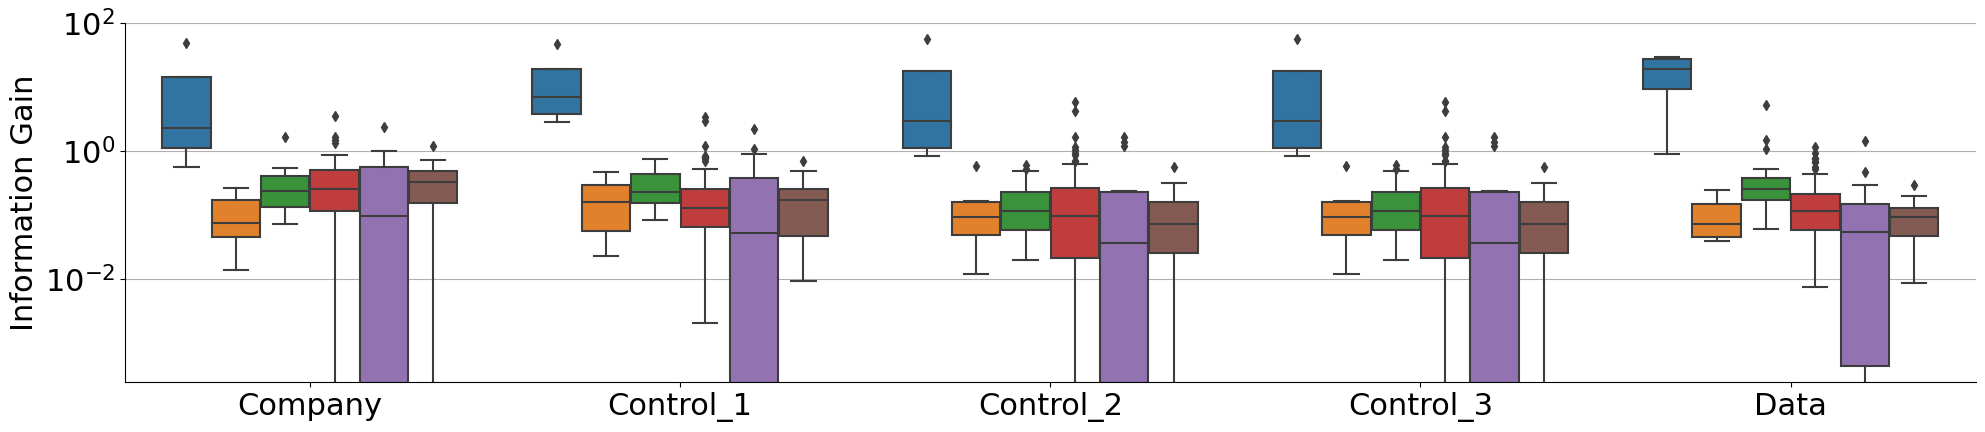

In [154]:
sns.plotting_context()
plt.rcParams.update({'font.size': 22})
plt.rc('axes', axisbelow=True)

ax = sns.catplot(x="project", 
                 y="average", 
                 #row = "scenario",
                 hue="category",
                 kind="box",data=lightgbm1_df,
                 legend=False, legend_out=True, height=5, aspect=4)

#ax.despine(left=True)
#plt.legend(loc='lower center', ncol=3, bbox_to_anchor=[0, -0.35], fancybox=True)
ax.set(yscale="log")
ax.set_axis_labels('', 'Information Gain')
plt.grid(axis = 'y')
f = ax.fig
plt.savefig('tr-top.pdf', bbox_inches='tight') 


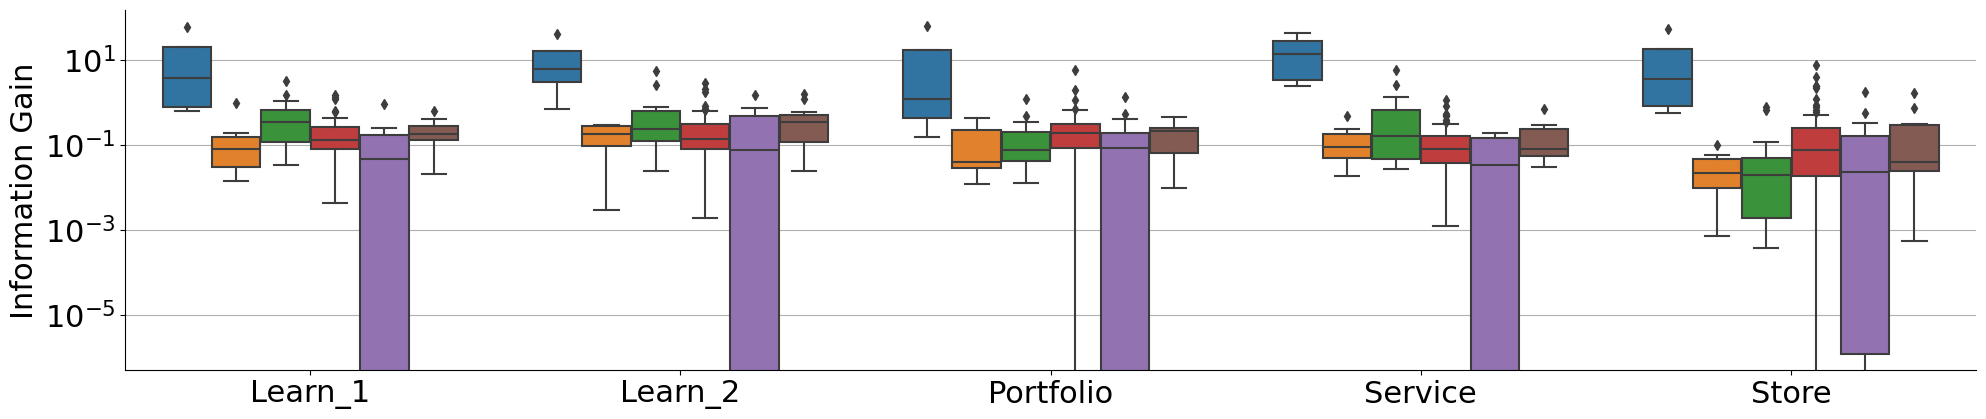

In [155]:
sns.plotting_context()

ax = sns.catplot(x="project", 
                 y="average", 
                 #row = "scenario",
                 hue="category",
                 kind="box",data=lightgbm2_df,
                 legend=False, legend_out=True, height=5, aspect=4)

#ax.despine(left=True)
#plt.legend(loc='lower center', ncol=3, bbox_to_anchor=[0, -0.35], fancybox=True)
ax.set(yscale="log")
ax.set_axis_labels('', 'Information Gain')
plt.grid(axis = 'y')
f = ax.fig
plt.savefig('tr-bottom.pdf', bbox_inches='tight') 

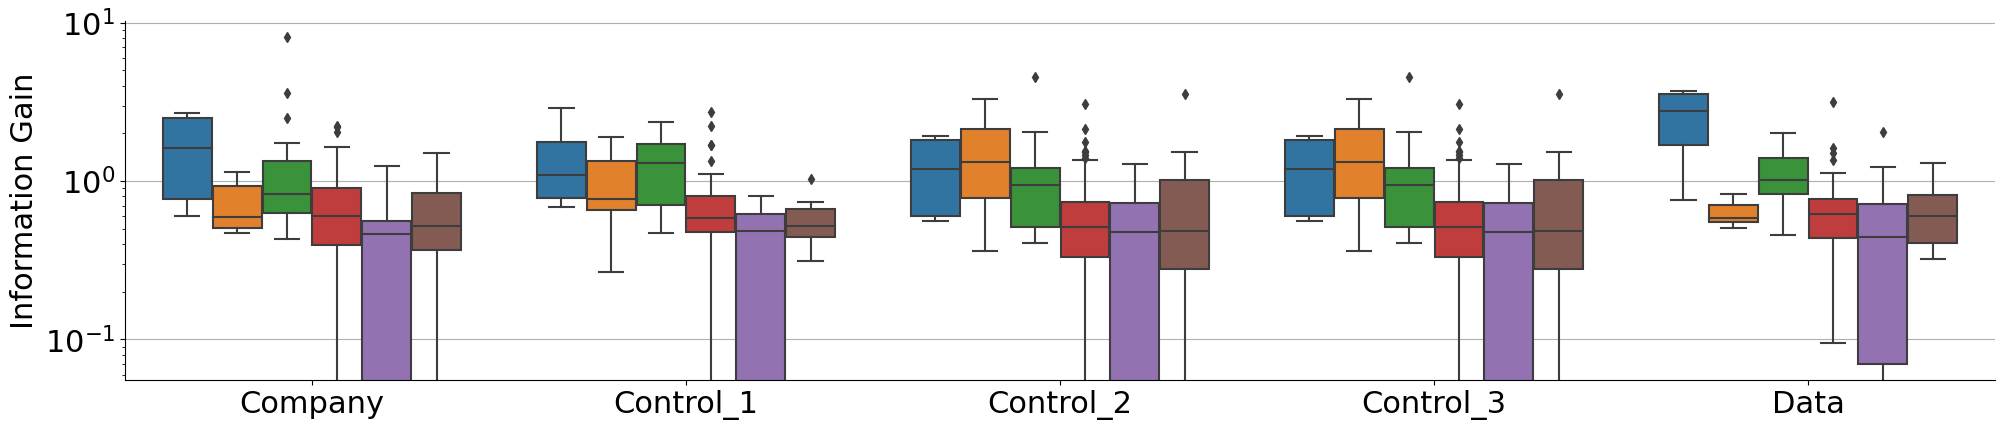

In [156]:
sns.plotting_context()

ax = sns.catplot(x="project", 
                 y="average", 
                 #row = "scenario",
                 hue="category",
                 kind="box",data=xgboost1_df,
                 legend=False, legend_out=True, height=5, aspect=4)

#ax.despine(left=True)
#plt.legend(loc='lower center', ncol=3, bbox_to_anchor=[0, -0.35], fancybox=True)
ax.set(yscale="log")
ax.set_axis_labels('', 'Information Gain')
plt.grid(axis = 'y')
f = ax.fig
plt.savefig('tm-top.pdf', bbox_inches='tight') 

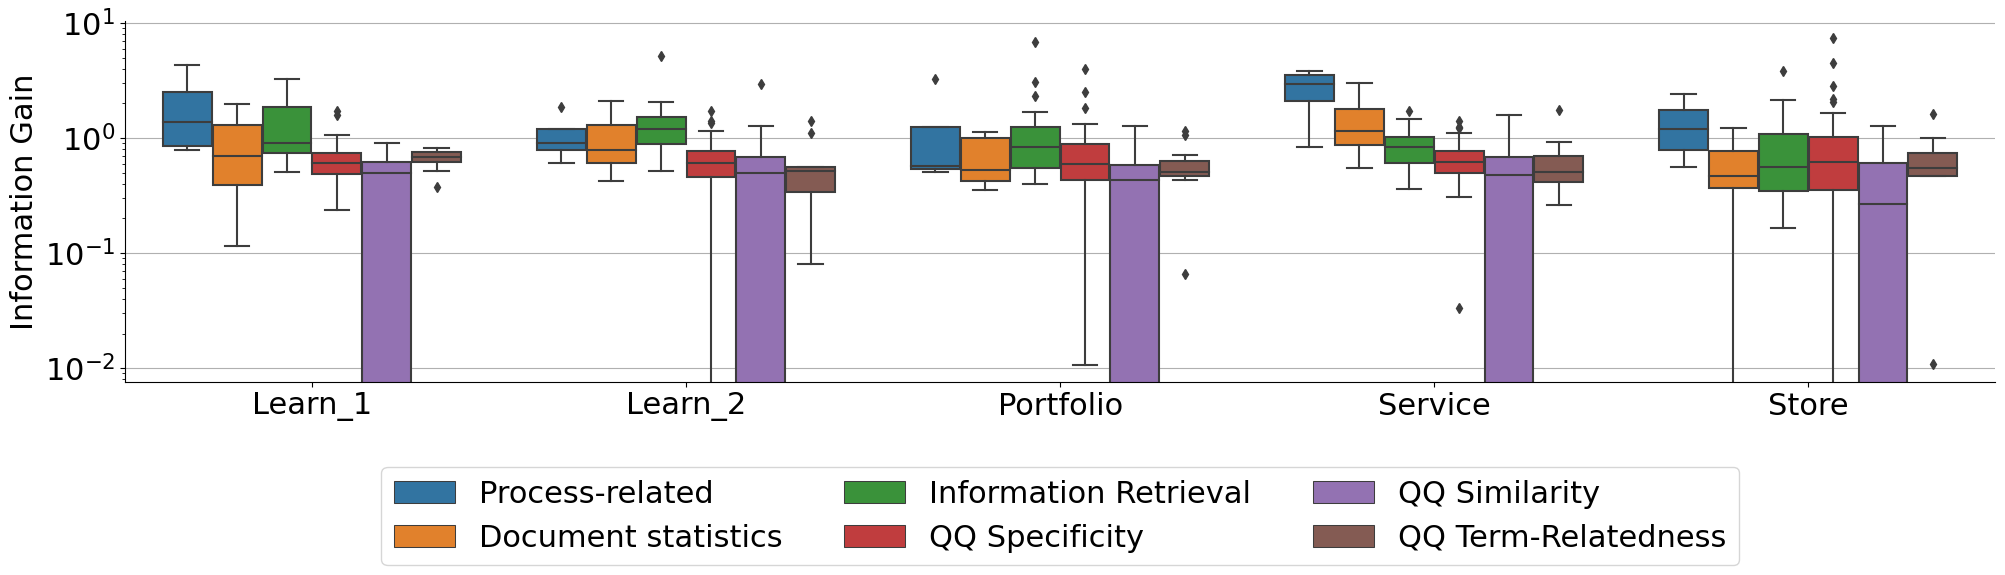

In [158]:
sns.plotting_context()

ax = sns.catplot(x="project", 
                 y="average", 
                 #row = "scenario",
                 hue="category",
                 kind="box",data=xgboost2_df,
                 legend=False, legend_out=True, height=5, aspect=4)

#ax.despine(left=True)
plt.legend(loc='lower center', ncol=3, bbox_to_anchor=[0.5, -0.55], fancybox=True)
ax.set(yscale="log")
ax.set_axis_labels('', 'Information Gain')
plt.grid(axis = 'y')
f = ax.fig
plt.savefig('tm-bottom.pdf', bbox_inches='tight') 